# code sample on 10 voice commands: 10X10=100 MP3 files: Custom Voice Command Identification with Lightweight Neural Networks for Astronaut Assistance in Space Missions (Custom Voice Command Identification)

# We took CNN as our base model

# Importing Libraries & Data

In [5]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
dataset='/content/drive/MyDrive/Voice/Voice data/'
pd.DataFrame(os.listdir(dataset),columns=['Files'])

,Files
0,voice_commands_space-dataset.csv
1,4
2,8
3,3
4,6
5,9
6,7
7,10
8,1
9,2


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def count(path):
    size=[]
    for file in os.listdir(path):
        # Check if 'file' is a directory before calling os.listdir()
        if os.path.isdir(os.path.join(path, file)):
            size.append(len(os.listdir(os.path.join(path,file))))
    return pd.DataFrame(size,columns=['Number Of Sample'],index=[f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
v_count=count(dataset)
v_count

,Number Of Sample
4,10
8,10
3,10
6,10
9,10
7,10
10,10
1,10
2,10
5,10


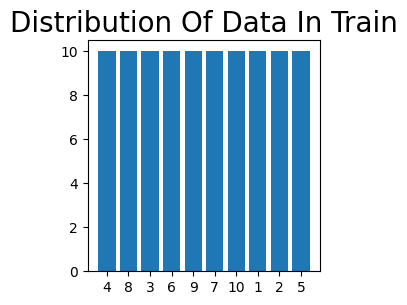

In [8]:
plt.figure(figsize=(3,3))
# Correct usage: x-coordinates (v_count.index) and heights (v_count['Number Of Sample'])
plt.bar(x=v_count.index, height=v_count['Number Of Sample'])
plt.title('Distribution Of Data In Train',fontsize=20)
plt.show()


## sample Audio label 1- reading the command- deploy solay panels


In [9]:
ipd.Audio('/content/drive/MyDrive/Voice/Voice data/1/1.mp3')

In [10]:
ipd.Audio('/content/drive/MyDrive/Voice/Voice data/3/1.mp3')

In [11]:
# showing 5 audious from label 1
import os
from IPython.display import Audio

# Directory containing audio files
audio_dir = "/content/drive/MyDrive/Voice/Voice data/1"

# List all audio files in the directory
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.mp3')]

# Load and display each audio file using a loop
for audio_file in audio_files[:5]:
    audio_path = os.path.join(audio_dir, audio_file)
    print(f"Playing: {audio_file}")
    display(Audio(audio_path))


Playing: 1.mp3


Playing: 2.mp3


Playing: 3.mp3


Playing: 4.mp3


Playing: 5.mp3


In [12]:
def load(path):
    data=[]
    label=[]
    sample=[]
    for file in os.listdir(path):
        path_=os.path.join(path,file)
        # Check if 'path_' is a directory before calling os.listdir()
        if os.path.isdir(path_):
            for fil in os.listdir(path_):
                data_contain,sample_rate=lr.load(os.path.join(path_,fil) ,sr= None)
                data.append(data_contain)
                sample.append(sample_rate)
                label.append(file)
    return data,label,sample

In [13]:
data,label,sample=load(dataset)
df=pd.DataFrame()
df['Label'],df['sample']=label,sample
df

,Label,sample
0,4,24000
1,4,24000
2,4,24000
3,4,24000
4,4,24000
...,...,...
95,5,24000
96,5,24000
97,5,24000
98,5,24000


# Audio Feature Extraction

In [14]:
#waveform
def waveform(data,sr,label):
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr)
    plt.suptitle(label)
    plt.title('Waveform plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
#MFCC features
def mfcc(data, sr):
    mfccs = lr.feature.mfcc(y=data, sr=sr)
    return np.mean(mfccs), mfccs
def mfcc_v(mfccs,label):
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.suptitle(label)
#Mel-spectrogram
def Mel(data, sr):
    mel_spec = lr.feature.melspectrogram(y=data, sr=sr)
    return np.mean(mel_spec), mel_spec
def mel_v(mel_spec,label,sr):
    # Convert to decibel scale
    mel_spec_db = lr.power_to_db(mel_spec, ref=np.max)
    # Visualize Mel-spectrogram
    plt.figure(figsize=(10, 4))
    lr.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')
    plt.suptitle(label)
#zero_crossing_rate
def zero_crossing(data,sr):
    # Compute zero-crossing rate
    zcr = lr.feature.zero_crossing_rate(data)
    # Print average zero-crossing rate
    avg_zcr = sum(zcr[0])/len(zcr[0])
    print("Average zero-crossing rate:", avg_zcr)
    return zcr
def zero_crossing_v(zcr,label,data,sr):
    time = lr.times_like(zcr)
    # Create waveform plot
    plt.figure(figsize=(14, 5))
    lr.display.waveshow(data, sr=sr, alpha=0.5)
    plt.plot(time, zcr[0], color='r')
    plt.title('Zero-crossing rate')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.suptitle(label)

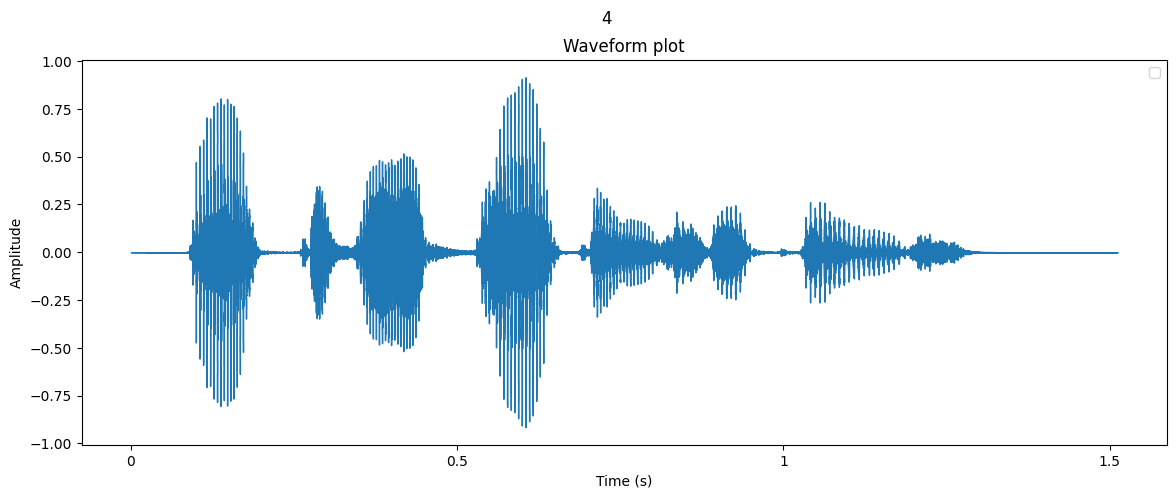

In [15]:
#waveform data[0]
waveform(data[0],sample[0],label[0])
plt.legend()

MFCCs Mean: -15.007131
MFCCs shape: (20, 71)


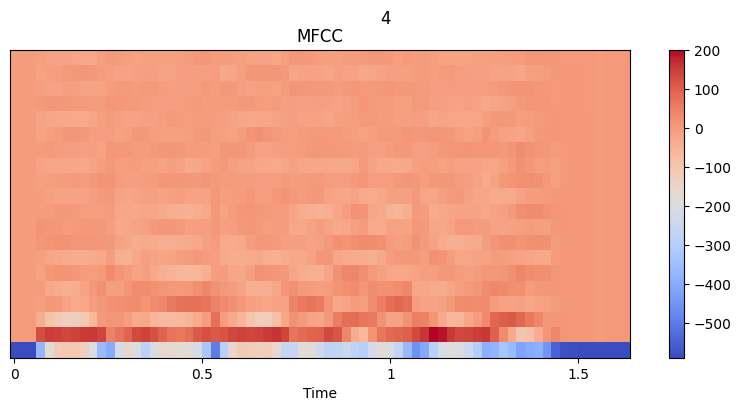

In [16]:
#MFCC data[0]
mfccs_mean, mfccs = mfcc(data[0], sample[0])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[0])

Mel Mean: 1.8208066
Mel : (128, 71)


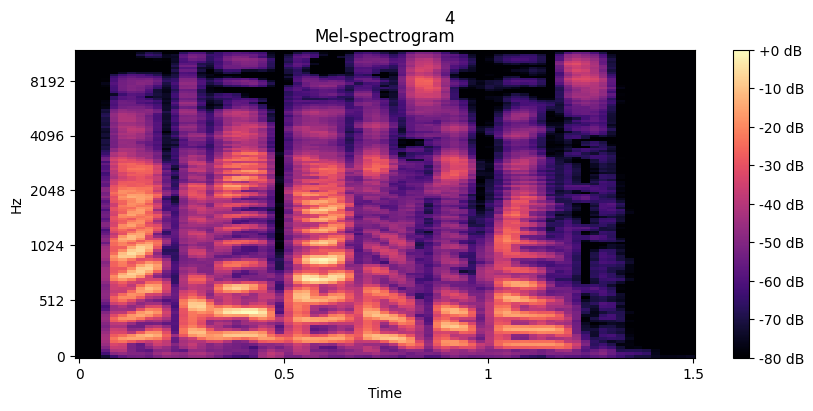

In [17]:
##Mel-spectrogram data[0]
mel_mean,mel=Mel(data[0],sample[0])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[0],sample[0])

Average zero-crossing rate: 0.1344148877640845
Zcr: (1, 71)


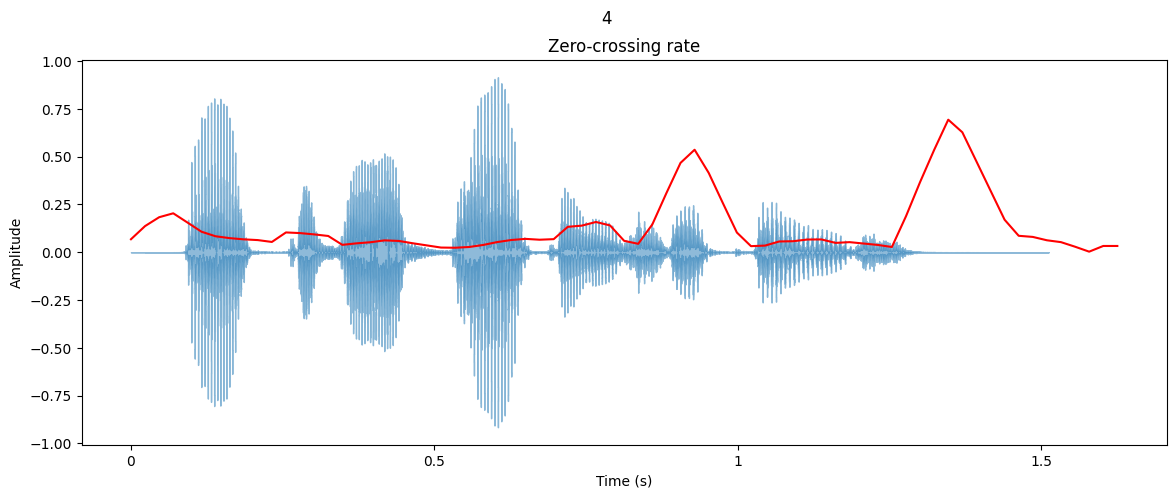

In [18]:
#zero_crossing data[0]
zcr=zero_crossing(data[0],sample[0])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[0],data[0],sample[0])

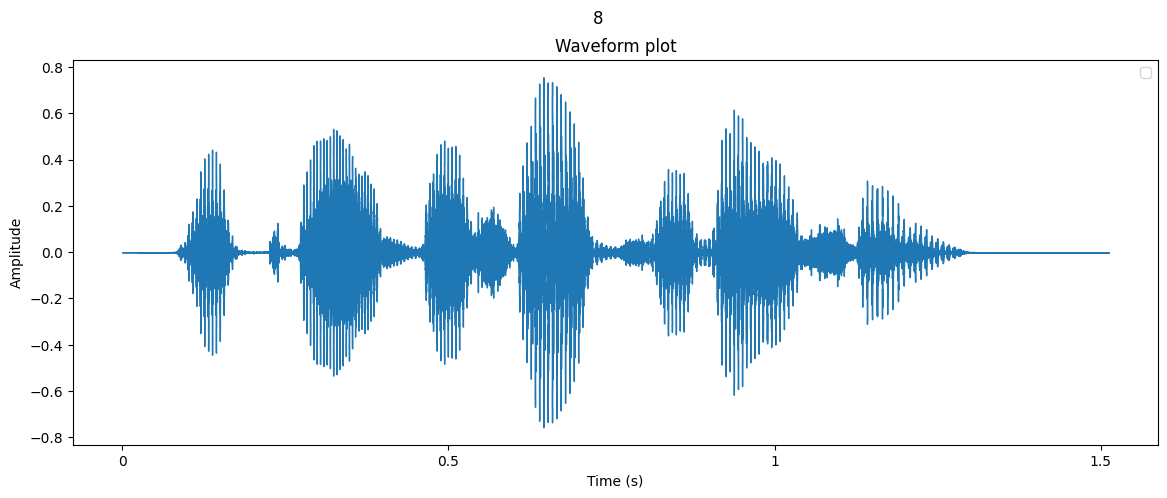

In [19]:
#waveform data[10]
waveform(data[10],sample[10],label[10])
plt.legend()

MFCCs Mean: -14.40249
MFCCs shape: (20, 71)


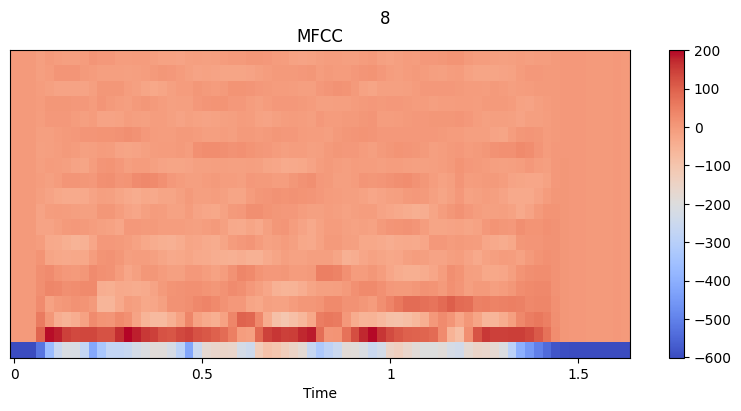

In [20]:
#MFCC data[10]
mfccs_mean, mfccs = mfcc(data[10], sample[10])
print('MFCCs Mean:', mfccs_mean)
print('MFCCs shape:', mfccs.shape)
mfcc_v(mfccs,label[10])

Mel Mean: 1.9790851
Mel : (128, 71)


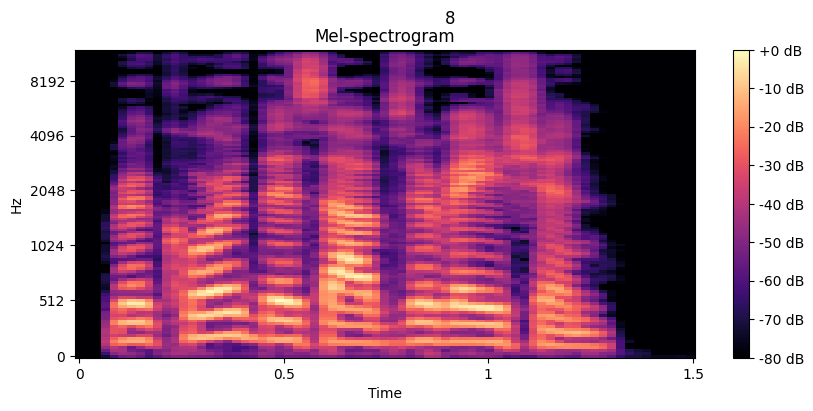

In [21]:
##Mel-spectrogram data[10]
mel_mean,mel=Mel(data[10],sample[10])
print('Mel Mean:',mel_mean)
print('Mel :',mel.shape)
mel_v(mel,label[10],sample[10])

Average zero-crossing rate: 0.10987703565140845
Zcr: (1, 71)


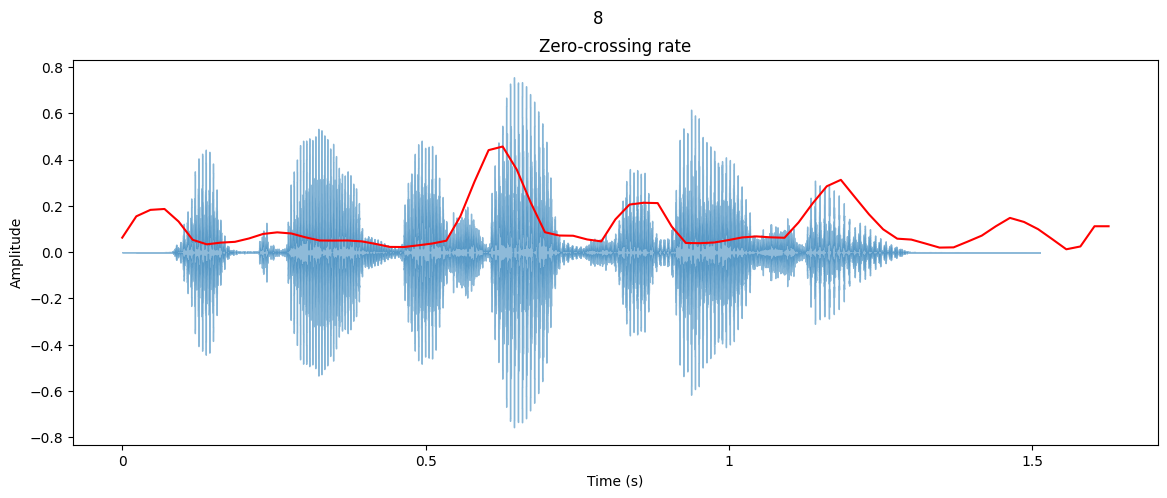

In [22]:
#zero_crossing data[10]
zcr=zero_crossing(data[10],sample[10])
print('Zcr:',zcr.shape)
zero_crossing_v(zcr,label[10],data[10],sample[10])

In [29]:
code={}
x=0
for i in pd.unique(label):
    code[i]=x
    x+=1
pd.DataFrame(code.values(),columns=['Value'],index=code.keys())

<ipython-input-29-79bf783246fd>:3: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for i in pd.unique(label):


,Value
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [30]:
def get_Name(N):
    for x,y in code.items():
          if y==N:
                return x
for i in range(len(label)):
    label[i]=code[label[i]]
pd.DataFrame(label,columns=['Labels'])

,Labels
0,0
1,0
2,0
3,0
4,0
...,...
95,9
96,9
97,9
98,9


# Splitting Data

In [46]:
!pip install librosa

import librosa as lr
import numpy as np

def pad_or_truncate(audio_data, target_length):
    """Pads or truncates an audio signal to a specified length.

    Args:
        audio_data (np.ndarray): The audio signal.
        target_length (int): The desired length of the signal.

    Returns:
        np.ndarray: The padded or truncated audio signal.
    """
    length = len(audio_data)
    if length < target_length:
        # Pad with zeros
        return np.pad(audio_data, (0, target_length - length), 'constant')
    elif length > target_length:
        # Truncate
        return audio_data[:target_length]
    else:
        # No change needed
        return audio_data

# Assume 'data_audio' is your list of audio samples
target_length = 24000  # Set your desired uniform length
data_audio,label,sample=load(dataset) # Reload data_audio, label, sample
# Pad or truncate each audio sample in the 'data_audio' list
data_audio = [pad_or_truncate(sample, target_length) for sample in data_audio]

# Now you can reshape the 'data_audio' list into a NumPy array
data_audio = np.array(data_audio).reshape(-1, target_length, 1)

# Proceed with your model training, using data_audio instead of data

In [47]:
#data=np.array(data).reshape(-1,100,1)
label = np.array(label, dtype=np.int32)
X_train, X_test, y_train, y_test = train_test_split(data_audio, label, test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (90, 24000, 1)
X_test shape is  (10, 24000, 1)
y_train shape is  (90,)
y_test shape is  (10,)


# Model Building

In [52]:
num_class=len(pd.unique(label))
# Add 1 to num_class to accommodate all label values
num_class += 1
model=keras.Sequential()
model.add(keras.layers.Conv1D(filters=8, kernel_size=13,activation=tf.nn.relu,input_shape=(24000,1))) # Adjust input_shape to match data_audio
model.add(keras.layers.MaxPooling1D(3)) # First MaxPooling1D layer
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=16, kernel_size=11,activation=tf.nn.relu, padding='same')) # Added padding='same'
model.add(keras.layers.MaxPooling1D(2)) # Added MaxPooling1D to reduce size
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=32, kernel_size=9,activation=tf.nn.relu, padding='same')) # Added padding='same'
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=64, kernel_size=7,activation=tf.nn.relu, padding='same')) # Added padding='same'
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(num_class,activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)                   │ (None, 23988, 8)            │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 7996, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 7996, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 7996, 16)            │           1,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 3998, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 3998, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 3998, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 3998, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 3998, 64)            │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 3998, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 255872)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      65,503,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,558,379 (250.09 MB)

 Trainable params: 65,558,379 (250.09 MB)

 Non-trainable params: 0 (0.00 B)

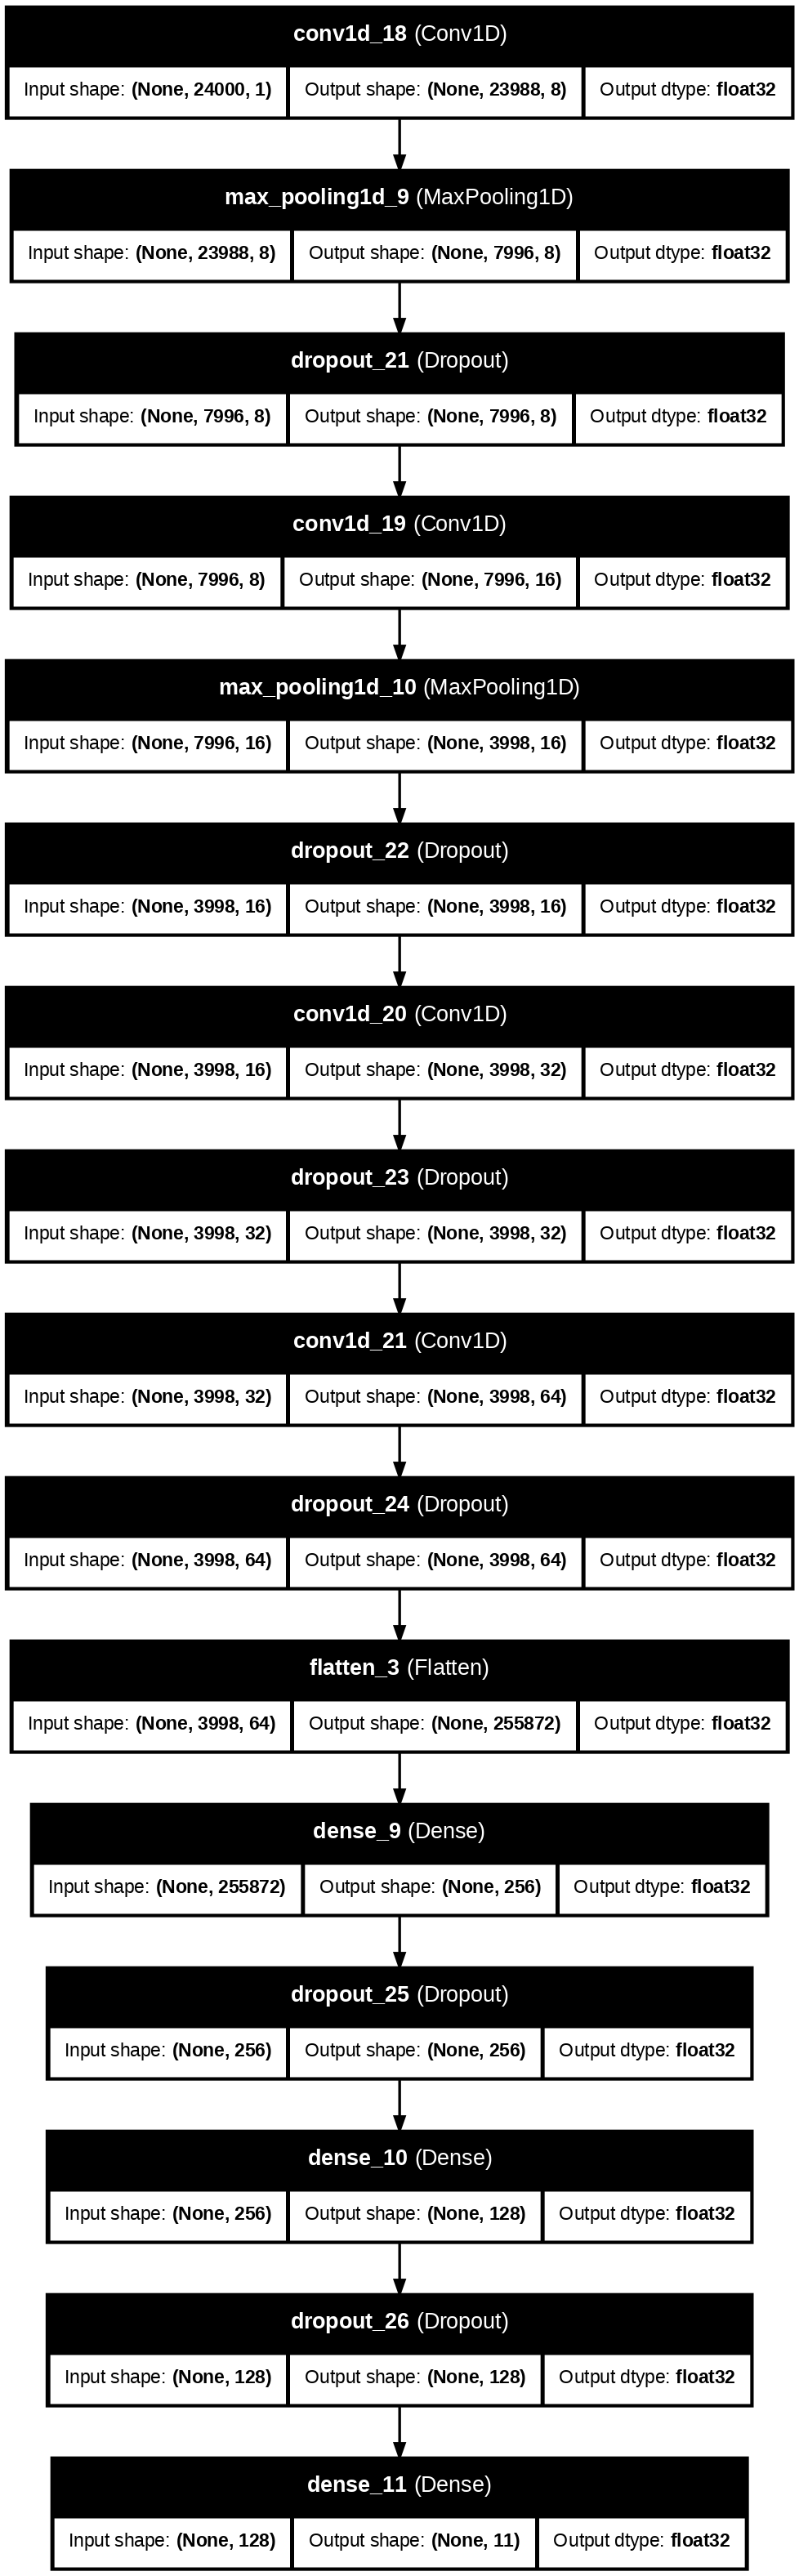

In [54]:

# Build the model by specifying the input shape
model.build(input_shape=(None, 24000, 1))  # None for batch size

# Now you can plot the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=120)

In [55]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0607 - loss: 2.6773
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3575 - loss: 2.1230
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4426 - loss: 1.8036
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5845 - loss: 1.4606
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6759 - loss: 0.9245
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8268 - loss: 0.5565
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8686 - loss: 0.3385
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8914 - loss: 0.3568
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9850 - loss: 0.1048
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9410 - loss: 0.1761
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9811 - loss: 0.0769
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0256
Epoch 13/30
3/3 ━

In [56]:
loss,acc=model.evaluate(X_test,y_test)
print('Loss is :',loss)
print('ACC is :',acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 1.0000 - loss: 0.0537
Loss is : 0.053716789931058884
ACC is : 1.0


In [57]:
hist_=hist.history
pd.DataFrame(hist_)

,accuracy,loss
0,0.066667,2.762853
1,0.355556,2.074781
2,0.455556,1.789520
3,0.622222,1.369912
4,0.711111,0.839485
5,0.833333,0.509419
6,0.877778,0.328975
7,0.900000,0.357786
8,0.977778,0.106514
9,0.944444,0.178047


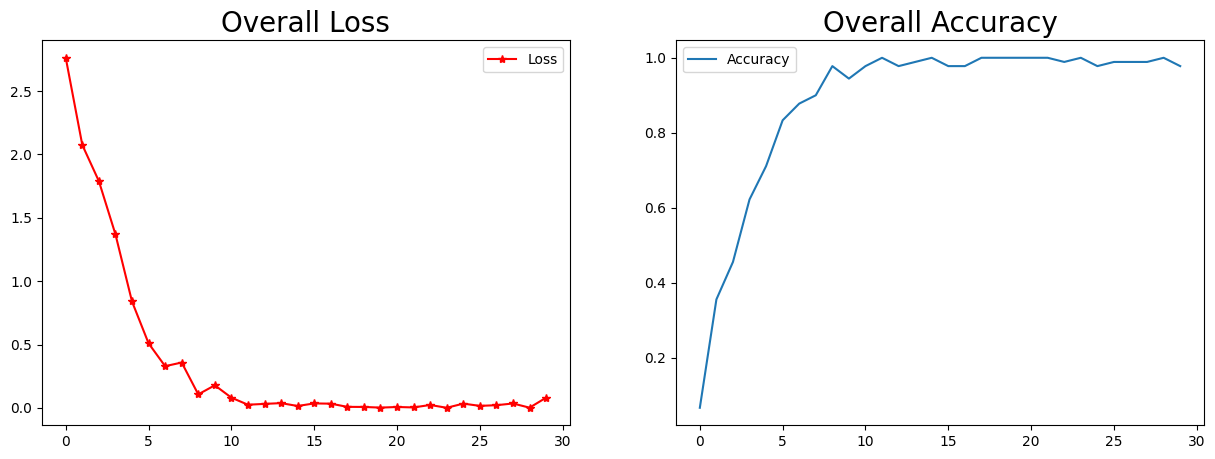

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],c='r',marker='*',label='Loss')
plt.title('Overall Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Accuracy')
plt.title('Overall Accuracy',fontsize=20)
plt.legend()

In [59]:
predict=model.predict(X_test)
predict[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


array([1.7712031e-11, 1.4452481e-10, 2.2588029e-14, 2.4460713e-12,
       2.9182535e-12, 3.6675520e-11, 1.1624412e-11, 7.9408925e-14,
       9.1201378e-12, 9.9999994e-01, 7.8848518e-11], dtype=float32)

In [60]:
preN=[]
prename=[]
for row in predict:
    N=np.argmax(row)
    preN.append(N)
    prename.append(get_Name(N))
pd.DataFrame(prename,columns=['Predictions'])

,Predictions
0,9.0
1,7.0
2,3.0
3,5.0
4,6.0
5,NaN
6,4.0
7,3.0
8,3.0
9,NaN


In [62]:
predict=[]
y_act=[]
# Get the number of samples in y_test
num_samples = len(y_test)

# Iterate over the valid range of indices in y_test
for p in range(num_samples):
    y_act.append(get_Name(y_test[p]))
    predict.append(prename[p])

pd_p=pd.DataFrame(y_act,columns=['y_act'])
pd_p['predict']=predict
pd_p

,y_act,predict
0,9.0,9.0
1,7.0,7.0
2,3.0,3.0
3,5.0,5.0
4,6.0,6.0
5,NaN,NaN
6,4.0,4.0
7,3.0,3.0
8,3.0,3.0
9,NaN,NaN


# Model Check

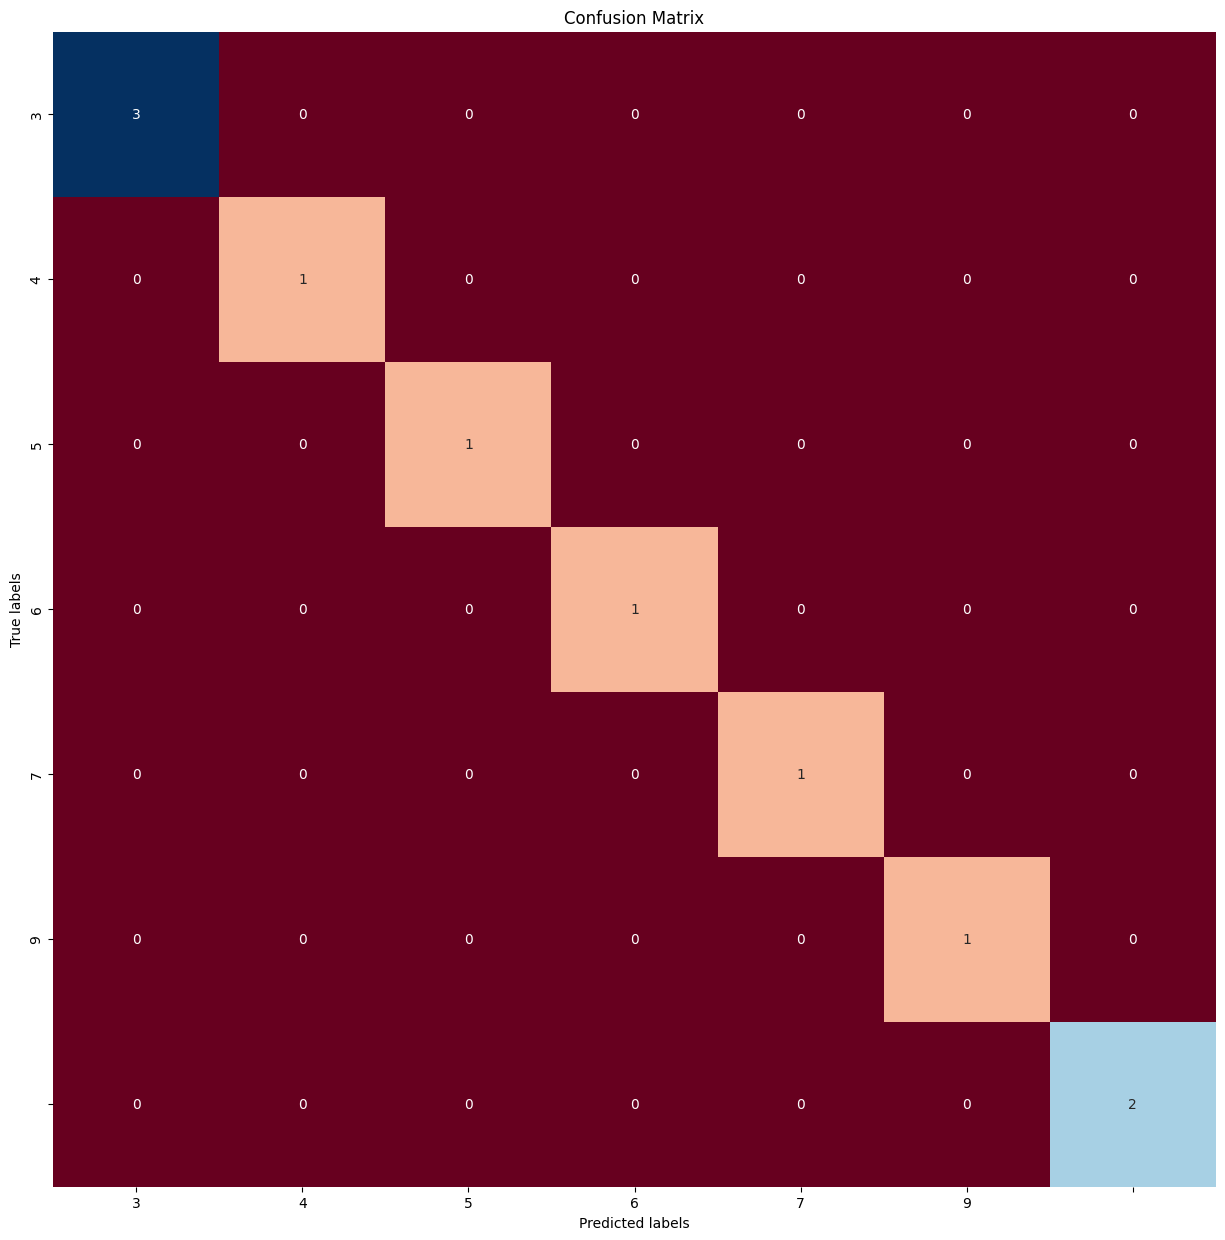

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 2]])

In [64]:
plt.figure(figsize=(15,15))
ax= plt.subplot()
CM = confusion_matrix(y_test, preN)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# Get unique labels from predictions
unique_labels = sorted(list(set(preN + y_test.tolist())))
# Get label names corresponding to unique labels
label_names = [get_Name(label) for label in unique_labels]
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()
CM

In [65]:
ClassificationReport = classification_report(y_test,preN)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Take one mp3 from label 6: test the trained model

In [67]:
import librosa as lr
import numpy as np

def predict_audio_file(audio_file_path, model):
    """Predicts the class label of a single audio file.

    Args:
        audio_file_path (str): The path to the audio file.
        model (keras.Model): The trained Keras model.

    Returns:
        str: The predicted class label.
    """
    # Load the audio file
    audio_data, sample_rate = lr.load(audio_file_path, sr=None)

    # Preprocess the audio
    audio_data = pad_or_truncate(audio_data, target_length=24000)  # Replace with your target length if different
    audio_data = audio_data.reshape(1, -1, 1)  # Reshape for model input

    # Make prediction
    prediction_probs = model.predict(audio_data)

    # Get predicted class
    predicted_class_index = np.argmax(prediction_probs)
    predicted_class_label = get_Name(predicted_class_index)

    return predicted_class_label


# Example usage:
audio_file_to_predict = '/content/drive/MyDrive/Voice/Voice data/test/test.mp3'  # Replace with the actual path
predicted_label = predict_audio_file(audio_file_to_predict, model)
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Predicted label: 6
